# Backtesting the MACD Crossover Strategy

## 1. Backtesting Overview

Backtesting is a technique used in finance to evaluate the performance of a trading strategy using historical data. The process involves simulating how a trading strategy would have performed in the past under specific conditions to assess its viability and potential profitability. Here's a general overview of the steps involved in backtesting:

#### 1. Define the Trading Strategy:

Specify the rules and criteria that will govern your trading decisions. This includes entry and exit points, risk management, position sizing, and any other relevant parameters.

#### 2. Acquire Historical Data:

Obtain historical market data for the assets you want to test your strategy on. This data typically includes price, volume, and other relevant information.

#### 3. Implement the Strategy:

Write a computer program or use a trading platform that allows you to input and execute your trading strategy on historical data. This program will simulate how your strategy would have traded over the chosen historical period.

#### 4. Simulate Trades:

Apply your strategy to the historical data, making virtual trades based on the rules you've defined. Track the performance of each trade, including entry and exit prices, transaction costs, and other relevant metrics.

#### 5. Evaluate Performance:

Measure and analyze the performance of your strategy. Common performance metrics include total returns, risk-adjusted returns (Sharpe ratio), maximum drawdown, win/loss ratio, and other statistics.

#### 6. Optimize and Refine:

If the initial results are not satisfactory, refine your strategy by adjusting parameters or incorporating new rules. Be cautious not to over-optimize the strategy to fit historical data too closely.

#### 7. Out-of-Sample Testing:

After refining the strategy, conduct out-of-sample testing on a different set of historical data to validate its robustness. This helps ensure that your strategy is not just overfitting to specific market conditions.

#### 8. Paper Trading or Forward Testing:

Before deploying your strategy in a live market, consider paper trading or forward testing in real-time with current market data. This helps validate the strategy's performance under current market conditions.

#### 9. Risk Management:

Implement risk management principles to control potential losses. This includes setting stop-loss levels, position sizing, and other measures to protect capital.

#### 10. Monitor and Adapt:

Even after deploying a strategy, continuously monitor its performance and be prepared to adapt if market conditions or the strategy's effectiveness change.

**This script follows steps 1-5.**

> **Note:** It's important to note that backtesting has limitations. Historical data might not accurately represent future market conditions, and slippage, transaction costs, and liquidity issues may not be fully accounted for. Therefore, while backtesting is a valuable tool, it should be used in conjunction with other forms of analysis and risk management when making real-world trading decisions.


----

## 2. Import Libraries

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

----

## 3. Define Functions

### 3.1 fetch_historical_data

- Fetches historical stock price data from Yahoo Finance for a given list of assets within a specified date range.
- Provides flexibility for fetching data for a single stock or multiple stocks.

In [9]:
def fetch_historical_data(assets, start_date, end_date):
    """
    Fetch historical stock price data from Yahoo Finance.

    Parameters:
    - assets (list or str): List of stock tickers or a single stock ticker as a string.
    - start_date (str): Start date for data retrieval in "YYYY-MM-DD" format.
    - end_date (str): End date for data retrieval in "YYYY-MM-DD" format.

    Returns:
    - pd.DataFrame: Historical stock price data.

    Example:
    >>> assets = ['AAPL', 'GOOGL', 'MSFT']
    >>> start_date = '2023-01-01'
    >>> end_date = '2023-12-31'
    >>> data = fetch_historical_data(assets, start_date, end_date)
    >>> print(data.head())
                  AAPL        GOOGL        MSFT
    Date
    2023-01-01  150.00      2800.00      300.00
    2023-01-02  152.50      2825.00      305.00
    2023-01-03  155.00      2850.00      310.00
    2023-01-04  157.50      2875.00      315.00
    2023-01-05  160.00      2900.00      320.00
    """
    
    if isinstance(assets, str):
        assets = [assets]
    
    if len(assets) == 1:
        # Wrap the Series in a DataFrame for consistency:
        data = pd.DataFrame(yf.download(assets, start=start_date, end=end_date)['Adj Close'])
    else:
        data = yf.download(assets, start=start_date, end=end_date)['Adj Close']
        
    return data

----

### 3.2 Moving Average Crossover Strategy

- The `moving_average_crossover_strategy` function implements a simple yet powerful trading strategy based on moving average crossovers. This strategy is widely used in technical analysis to identify potential trend reversals and generate buy/sell signals.

#### Moving Averages

- **Short-term Moving Average (short_mavg):**
  - Calculated using a specified short window span.
  - Provides a more responsive trend indicator.

- **Long-term Moving Average (long_mavg):**
  - Calculated using a specified long window span.
  - Represents a smoothed trend indicator with a longer-term perspective.

#### Signal Generation

- **Buy Signal:**
  - Triggered when the short-term moving average crosses above the long-term moving average.
  - Indicates a potential upward trend.

- **Sell Signal:**
  - Triggered when the short-term moving average crosses below the long-term moving average.
  - Indicates a potential downward trend.

#### Parameters

- **data (pd.DataFrame):**
  - Historical stock price data, including the 'Adj Close' column.

- **short_span (int):**
  -  Refers to the number of days (or time periods) used to calculate the Short-term moving average.

- **long_span (int):**
  - Long-term moving average window.

#### Usage

**Signal DataFrame:**
   - The function returns a DataFrame with buy/sell signals.
   - The 'signal' column indicates buy (1.0), sell (0.0), or no action (0.0).

In [12]:
def moving_average_crossover_strategy(data, short_span, long_span):
    """
    Implement a simple moving average crossover trading strategy.

    Parameters:
    - data (pd.DataFrame): Historical stock price data.
    - short_span (int): Short-term moving average window.
    - long_span (int): Long-term moving average window.

    Returns:
    - pd.DataFrame: DataFrame with buy/sell signals.
    """
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create short simple moving average
    signals['short_mavg'] = data['Adj Close'].rolling(window=short_span, min_periods=1, center=False).mean()

    # Create long simple moving average
    signals['long_mavg'] = data['Adj Close'].rolling(window=long_span, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_span:] = np.where(signals['short_mavg'][short_span:] > signals['long_mavg'][short_span:], 1.0, 0.0)   

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

#### Example 1: Simulating Buy and Sell Signals

> **Note:** The initial `short_span` number of rows do not yield a buy/sell position as the moving average calculation requires more data.

In [15]:
# Load historical stock price data
data = fetch_historical_data(assets='AAPL', start_date='2021-01-01', end_date='2021-04-01')

# Set short and long window spans
short_span = 3
long_span = 7

# Apply the moving average crossover strategy
signals = moving_average_crossover_strategy(data, short_span, long_span)
print(signals)

[*********************100%%**********************]  1 of 1 completed

            signal  short_mavg   long_mavg  positions
Date                                                 
2021-01-04     0.0  127.164154  127.164154        NaN
2021-01-05     0.0  127.950279  127.950279        0.0
2021-01-06     0.0  126.767827  126.767827        0.0
2021-01-07     1.0  127.262426  127.237858        1.0
2021-01-08     0.0  127.603078  127.741959       -1.0
...            ...         ...         ...        ...
2021-03-25     0.0  119.149956  119.765258        0.0
2021-03-26     0.0  118.713664  119.266171        0.0
2021-03-29     0.0  119.140111  119.387076        0.0
2021-03-30     0.0  118.913770  119.374426        0.0
2021-03-31     1.0  119.222122  119.200098        1.0

[61 rows x 4 columns]


----

### 3.3 Performance Evaluation

- This function is used to asses the performance of the MACD Crossover strategy.
- The following metrics are used to evaluate the performance of the trading strategy:

#### 1. Total Returns

Total returns represent the overall percentage change in the cumulative strategy returns over the analyzed period.

#### 2. Annualized Returns

Annualized returns provide a standardized measure of the strategy's performance on an annual basis. It considers the compounding effect of returns over time.

#### 3. Sharpe Ratio

The Sharpe ratio measures the risk-adjusted performance of the strategy. It indicates how well the strategy's returns compensate for the level of risk taken. A higher Sharpe ratio is generally desirable.

#### 4. Max Drawdown

Maximum drawdown represents the largest percentage decline in the cumulative strategy returns from a peak to a trough. It helps assess the strategy's vulnerability to significant losses.

#### 5. Win/Loss Ratio

The win/loss ratio is the ratio of the number of buy (win) signals to sell (loss) signals. It provides insights into the strategy's effectiveness in generating profitable trades.

> **Note:** It's important to interpret these metrics collectively, considering their interplay and potential trade-offs. While a high total return is desirable, it should be assessed in conjunction with risk metrics like the Sharpe ratio and max drawdown to ensure a balanced evaluation of the strategy's performance.

In [21]:
def evaluate_performance(data, signals):
    """
    Evaluate the performance of the trading strategy.

    Parameters:
    - data (pd.DataFrame): Historical stock price data.
    - signals (pd.DataFrame): DataFrame with buy/sell signals.

    Returns:
    - dict: Dictionary containing performance metrics.
    """
    # Calculate daily returns
    data['daily_returns'] = data['Adj Close'].pct_change()

    # Calculate strategy returns
    signals['strategy'] = signals['positions'].shift(1) * data['daily_returns']

    # Calculate cumulative returns
    data['cumulative_strategy'] = (1 + signals['strategy']).cumprod() - 1

    # Calculate total returns
    total_returns = data['cumulative_strategy'].iloc[-1]

    # Calculate annualized returns
    annualized_returns = (1 + total_returns) ** (252 / len(data.index.year.unique())) - 1

    # Calculate Sharpe ratio using total returns of the strategy
    sharpe_ratio = np.sqrt(252) * signals['strategy'].mean() / data['daily_returns'].std()

    # Calculate maximum drawdown
    max_drawdown = (1 + data['cumulative_strategy']).cummax() - 1

    # Calculate win/loss ratio
    win_ratio = len(signals[signals['positions'] == 1]) / len(signals[signals['positions'] == -1])

    # Calculate number of trades
    num_trades = len(signals[signals['positions'] != 0])

    performance_metrics = {
        'Total Returns': total_returns,
        'Annualized Returns': annualized_returns,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown.min(),
        'Win/Loss Ratio': win_ratio,
        'Number of Trades': num_trades
    }

    return performance_metrics

#### Example 2: Evaluating the MACD Crossover Strategy

In [24]:
# Load historical stock price data
data = fetch_historical_data(assets='AAPL', start_date='2021-01-01', end_date='2021-04-01')

# Set short and long window spans
short_span = 10
long_span = 30

# Apply the moving average crossover strategy
signals = moving_average_crossover_strategy(data, short_span, long_span)

# Evaluate performance metrics
performance_metrics = evaluate_performance(data, signals)

# Print performance metrics
print("Performance Metrics:")
for metric, value in performance_metrics.items():
    print(f"{metric}: {value}")

[*********************100%%**********************]  1 of 1 completed

Performance Metrics:
Total Returns: 0.017202698171258524
Annualized Returns: 72.56832686899587
Sharpe Ratio: 0.22179809589083524
Max Drawdown: 0.0
Win/Loss Ratio: 1.0
Number of Trades: 3


----

## 3.4 configure

- Responsible for setting user-defined configuration parameters.

### Understanding Moving Average Spans in Trading Strategies

When implementing a moving average crossover trading strategy, the choice of moving average spans (window sizes) is a critical decision that involves a combination of technical analysis, market conditions, and the trader's specific goals. Here are some insights into what analysts and traders consider when selecting moving average spans:

#### 1. Sensitivity to Price Movements:

- **Shorter Spans (10-20 periods):**
  - React more quickly to price changes.
  - Aim to capture short-term trends.
  - May generate signals more frequently, but with a risk of false signals due to price noise.

- **Longer Spans (50-200 periods):**
  - Provide a smoother average.
  - Less sensitive to short-term fluctuations.
  - Suitable for identifying longer-term trends, filtering out noise.

#### 2. Trade Frequency and Holding Period:

- **Short-Term Traders:**
  - Prefer shorter spans for frequent trading.
  - Capture rapid price movements.
  - Suitable for day traders or swing traders.

- **Longer-Term Investors:**
  - Opt for longer spans for extended holding periods.
  - Focus on broader market trends.
  - Reduce the impact of short-term market noise.

#### 3. Cross-Validation and Optimization:

- Experiment with different span combinations.
- Backtest strategies with historical data.
- Adjust parameters to maximize returns or minimize risks.
- Cross-validate to ensure robustness across various market conditions.

#### 4. Volatility Considerations:

- Adapt spans based on market volatility.
- Shorter spans for volatile markets.
- Longer spans for less volatile markets.
- Consider adaptive strategies for dynamic adjustments.

#### 5. Combining Multiple Timeframes:

- Use multiple moving averages with different spans.
- Combine short-term (fast) with long-term (slow) moving averages.
- Provide a more comprehensive analysis, avoiding false signals.

Ultimately, the choice of moving average spans depends on the trader's preferences, risk tolerance, and the characteristics of the assets being traded. Traders often iterate and refine their strategies over time based on market feedback and changing conditions.

> **Note:** The provided insights are general considerations, and traders may need to adapt their strategies based on individual preferences and market dynamics.

In [28]:
def configure():
    """
    Configure user-defined settings.

    Returns:
    - tuple: Tuple containing configuration settings (assets, start_date, end_date, window_size, bollinger_std, short_span, long_span, signal_span).
    """    
    assets = ["AAPL","MSFT", "AMZN"]
    start_date = "2021-01-01"
    end_date = "2023-01-01"
    short_span = 20
    long_span = 40

    return assets, start_date, end_date, short_span, long_span

----

## 3.5 main

- The `main` function serves as the central hub for executing the time series analysis and plotting in the script.

**Plotting Results:**
- Users can visualize the strategy's effectiveness by plotting historical prices along with short-term and long-term moving averages.

[*********************100%%**********************]  1 of 1 completed


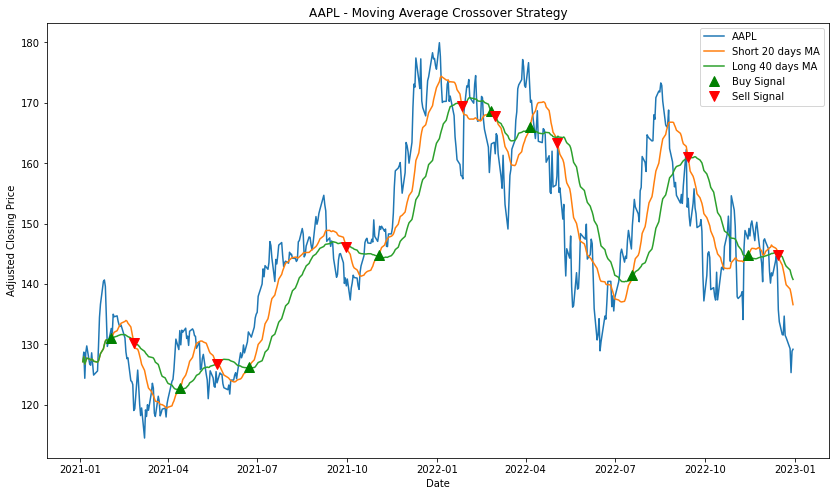

[*********************100%%**********************]  1 of 1 completed


Performance Metrics for AAPL:
Total Returns: -0.05853664896558752
Annualized Returns: -0.9994996997207192
Sharpe Ratio: -0.09498071478037451
Max Drawdown: 0.0
Win/Loss Ratio: 1.0
Number of Trades: 17


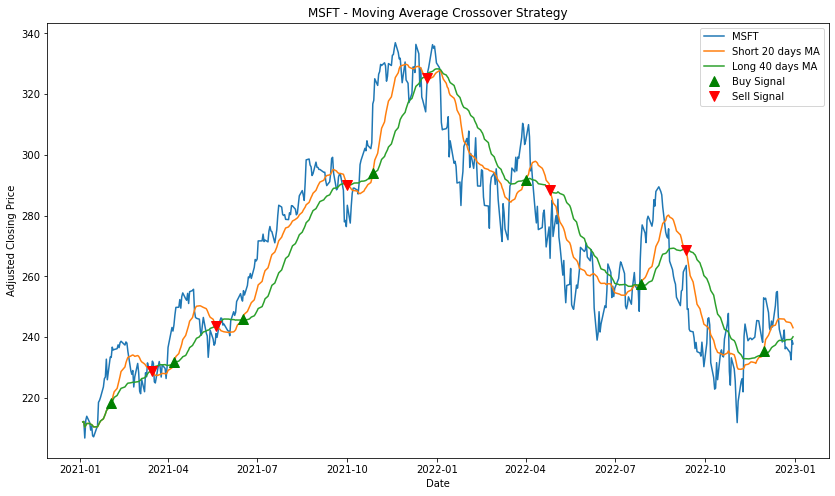

[*********************100%%**********************]  1 of 1 completed


Performance Metrics for MSFT:
Total Returns: 0.0954697735430825
Annualized Returns: 97644.05679534326
Sharpe Ratio: 0.16386293013122474
Max Drawdown: 0.0
Win/Loss Ratio: 1.1666666666666667
Number of Trades: 14


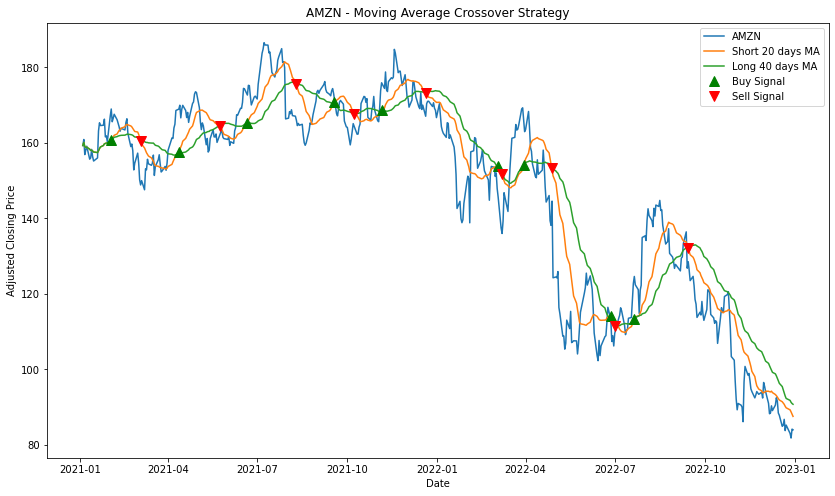


Performance Metrics for AMZN:
Total Returns: -0.10471322023065377
Annualized Returns: -0.9999991144081437
Sharpe Ratio: -0.1227507964990127
Max Drawdown: 0.0
Win/Loss Ratio: 1.0
Number of Trades: 19


In [32]:
def main():
    # Get configuration settings
    assets, start_date, end_date, short_span, long_span = configure()

    for asset in assets:
        # Fetch historical data for the current year:
        data = fetch_historical_data([asset], start_date, end_date)
        
        # Apply the moving average crossover strategy
        signals = moving_average_crossover_strategy(data, short_span, long_span)

        # Plot the strategy results
        plt.figure(figsize=(14, 8))
        plt.plot(data['Adj Close'], label=asset)
        plt.plot(signals['short_mavg'], label=f'Short {short_span} days MA')
        plt.plot(signals['long_mavg'], label=f'Long {long_span} days MA')

        # Plot buy signals
        plt.plot(signals.loc[signals.positions == 1.0].index,
                 signals.short_mavg[signals.positions == 1.0],
                 '^', markersize=10, color='g', label='Buy Signal')

        # Plot sell signals
        plt.plot(signals.loc[signals.positions == -1.0].index,
                 signals.short_mavg[signals.positions == -1.0],
                 'v', markersize=10, color='r', label='Sell Signal')

        plt.title(f"{asset} - Moving Average Crossover Strategy")
        plt.xlabel("Date")
        plt.ylabel("Adjusted Closing Price")
        plt.legend()
        plt.show()
        
        # Evaluate performance
        performance_metrics = evaluate_performance(data, signals)

        # Print performance metrics
        print(f"\nPerformance Metrics for {asset}:")
        for metric, value in performance_metrics.items():
            print(f"{metric}: {value}")

if __name__ == "__main__":
    main()

# Examples of Back-Testable Trading Strategies

## Technical Analysis Strategies:

- **Moving Average Crossovers:**
  - Identify trends based on the crossover of short-term and long-term moving averages.

- **RSI (Relative Strength Index) Signals:**
  - Use RSI to identify overbought or oversold conditions and potential trend reversals.

- **MACD (Moving Average Convergence Divergence) Signals:**
  - Utilize MACD signals to identify changes in momentum and potential buy/sell opportunities.

- **Bollinger Bands Strategies:**
  - Trade based on price volatility, exploiting overbought or oversold conditions.

- **Support and Resistance Levels:**
  - Determine entry and exit points based on historical support and resistance levels.

## Fundamental Analysis Strategies:

- **Earnings-Based Strategies:**
  - Incorporate corporate earnings data into trading decisions.

- **Dividend Yield Strategies:**
  - Focus on stocks with attractive dividend yields.

- **P/E (Price-to-Earnings) Ratio-Based Strategies:**
  - Evaluate stocks based on their P/E ratios.

- **Book Value-Based Strategies:**
  - Consider a company's book value in investment decisions.

## Quantitative Analysis Strategies:

- **Statistical Arbitrage:**
  - Exploit statistical mispricings between assets.

- **Pairs Trading:**
  - Capitalize on relative price movements between two correlated assets.

- **Momentum-Based Strategies:**
  - Trade based on the momentum of asset prices.

- **Mean-Reversion Strategies:**
  - Identify assets likely to revert to their historical mean.

## Machine Learning Strategies:

- **Classification Models for Buy/Sell Signals:**
  - Use machine learning algorithms to classify market signals.

- **Regression Models for Predicting Price Movements:**
  - Predict price changes based on historical data.

- **Reinforcement Learning for Dynamic Portfolio Optimization:**
  - Apply reinforcement learning to optimize portfolio allocation.

Regardless of the strategy type, back-testing is a crucial step for traders and investors. It helps assess historical performance, understand risks, and fine-tune parameters. However, it's essential to recognize that past performance doesn't guarantee future results. Market conditions evolve, and overfitting to historical data is a risk. Thus, back-testing should complement other analysis methods and risk management techniques.

----